In [1]:
%load_ext autoreload
%autoreload 2
    
from mindi.coverage.density_plot import extract_density
from mindi.coverage.pwm_density import PWMExtractor
from mindi.coverage.windows_maker import WindowMaker
from pybedtools import BedTool

In [2]:
import pandas as pd

In [3]:
windows = WindowMaker(base=0)

In [4]:
WINDOW_SIZE = 5000

In [5]:
chm13v2_oric_stochastic = pd.read_table("GSE128477_Stochastic_origins_hs1.bed", 
                                        header=None, 
                                        usecols=range(3),
                                        names=["seqID", "start", "end"]
                                       ).drop_duplicates()
chm13v2_oric_stochastic

,seqID,start,end
0,chr11,3305,3512
1,chr11,5576,5713
2,chr11,7600,7867
3,chr11,8335,8847
4,chr11,21073,21261
...,...,...,...
254286,chrY,62094207,62094387
254287,chrY,62110189,62110352
254288,chrY,62113808,62114106
254289,chrY,62121992,62122275


In [99]:
chm13v2_oric_stochastic = pd.read_table("GSE128477_Stochastic_origins_hs1.bed", 
                                        header=None, 
                                        usecols=range(3),
                                        names=["seqID", "start", "end"]
                                       ).drop_duplicates()
windows.window_size = WINDOW_SIZE
chm13v2_oric_stochastic = windows.make_windows(chm13v2_oric_stochastic, loci="mid")
chm13v2_oric_stochastic_bed = BedTool.from_dataframe(chm13v2_oric_stochastic)
chm13v2_oric_stochastic

,seqID,start,end
0,chr11,0,8409
1,chr11,644,10645
2,chr11,2733,12734
3,chr11,3591,13592
4,chr11,16167,26168
...,...,...,...
254286,chrY,62089297,62099298
254287,chrY,62105270,62115271
254288,chrY,62108957,62118958
254289,chrY,62117133,62127134


In [78]:
chm13v2_oric_stochastic.groupby("seqID")['end'].max()

seqID
chr1     248384469
chr10    134724754
chr11    135124214
chr12    133322081
chr13    113562041
chr14    101135428
chr15     99748457
chr16     96306904
chr17     84273855
chr18     80535973
chr19     61703821
chr2     242692074
chr20     66148330
chr21     45062254
chr22     51300784
chr3     201036036
chr4     193457968
chr5     182022901
chr6     172109774
chr7     160553941
chr8     146228892
chr9     150571161
chrX     154257488
chrY      62122801
Name: end, dtype: int64

In [100]:
chm13v2_oric_stochastic.duplicated().sum()

4

In [101]:
chm13v2_oric = pd.read_table("GSE128477_Core_origins_hs1.bed", header=None, usecols=range(3),
                            names=["seqID", "start", "end"]).drop_duplicates()
windows.window_size = WINDOW_SIZE
chm13v2_oric = windows.make_windows(chm13v2_oric, loci="mid")
chm13v2_oric_bed = BedTool.from_dataframe(chm13v2_oric)
chm13v2_oric

,seqID,start,end
0,chr11,7932,17933
1,chr11,23229,33230
2,chr11,58655,68656
3,chr1,221705773,221715774
4,chr1,221737542,221747543
...,...,...,...
62887,chrY,62079231,62089232
62888,chrY,62079905,62089906
62889,chrY,62081136,62091137
62890,chrY,62081538,62091539


In [102]:
chm13v2_g4hunter = pd.read_table("chm13v2_g4_datasets/chm13v2_g4hunter.txt")
chm13v2_g4hunter["strand"] = chm13v2_g4hunter["score"].apply(lambda x: "+" if x >= 0 else "-")
chm13v2_g4hunter_bed = BedTool.from_dataframe(chm13v2_g4hunter[["seqID", "start", "end", "strand"]])
chm13v2_g4hunter

,seqID,start,end,sequence,length,score,NBR,strand
0,chr10,17,42,ctaaccctaaccctaaccctaaccc,25,-1.48,NaN,-
1,chr10,21,48,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN,-
2,chr10,27,54,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN,-
3,chr10,33,60,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN,-
4,chr10,39,66,ccctaaccctaaccctaaccctaaccc,27,-1.67,NaN,-
...,...,...,...,...,...,...,...,...
2081176,chrY,62459974,62460001,gggttagggttagggttagggttaggg,27,1.67,NaN,+
2081177,chrY,62459980,62460007,gggttagggttagggttagggttaggg,27,1.67,NaN,+
2081178,chrY,62459986,62460013,gggttagggttagggttagggttaggg,27,1.67,NaN,+
2081179,chrY,62459992,62460019,gggttagggttagggttagggttaggg,27,1.67,NaN,+


In [103]:
chm13v2_regex = pd.read_table("chm13v2_g4_datasets/chm13v2_regex_motifs.txt")
chm13v2_regex_bed = BedTool.from_dataframe(chm13v2_regex[["seqID", "start", "end", "strand"]])
chm13v2_regex

,seqID,start,end,sequence,strand,length
0,chr1,2,25,CCCTAAACCCTAACCCCTAACCC,-,23
1,chr1,28,49,CCCTAACCCTAACCCTAACCC,-,21
2,chr1,52,75,CCCCTAAACCCTAACCCTAACCC,-,23
3,chr1,78,99,CCCTAACCCTAACCCTAACCC,-,21
4,chr1,102,123,CCCTAACCCTAACCCTAACCC,-,21
...,...,...,...,...,...,...
414899,chrM,2988,3012,CCCCCCTCCCCATACCCAACCCCC,-,24
414900,chrM,7674,7708,CCCGTATTTACCCTATAGCACCCCCTCTACCCCC,-,34
414901,chrM,9606,9631,CCCTATATCCCCCGCCCGCGTCCCC,-,25
414902,chrM,11784,11813,CCCTAACCCTGACTTCCCTAATTCCCCCC,-,29


# Estimate % of oRIC (stochastic & core) that do have at least one G4 in 10kb distance from the mid

In [104]:
# Stochastic
chm13v2_inter_stochastic_g4 = pd.read_table(
                        chm13v2_oric_stochastic_bed.intersect(chm13v2_g4hunter_bed, wao=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_stochastic_g4["strand"] = "+"
chm13v2_inter_stochastic_g4.loc[:, "without_g4"] = (chm13v2_inter_stochastic_g4["chrom"] == ".").astype(int)
chm13v2_inter_stochastic_regex = pd.read_table(
                        chm13v2_oric_stochastic_bed.intersect(chm13v2_regex_bed, wao=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_stochastic_regex.loc[:, "without_g4"] = (chm13v2_inter_stochastic_regex["chrom"] == ".").astype(int)
chm13v2_inter_stochastic_regex["strand"] = "+"

# Core
chm13v2_inter_core_g4 = pd.read_table(
                        chm13v2_oric_bed.intersect(chm13v2_g4hunter_bed, wao=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )

chm13v2_inter_core_g4.loc[:, "without_g4"] = (chm13v2_inter_core_g4["chrom"] == ".").astype(int)
chm13v2_inter_core_g4["strand"] = "+"

chm13v2_inter_core_regex = pd.read_table(
                        chm13v2_oric_bed.intersect(chm13v2_regex_bed, wao=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )

chm13v2_inter_core_regex.loc[:, "without_g4"] = (chm13v2_inter_core_regex["chrom"] == ".").astype(int)
chm13v2_inter_core_regex["strand"] = "+"
chm13v2_inter_core_regex

,seqID,start,end,chrom,motif_start,motif_end,score,overlap,without_g4,strand
0,chr11,7932,17933,chr11,8386,8407,-,21,0,+
1,chr11,7932,17933,chr11,9136,9162,-,26,0,+
2,chr11,7932,17933,chr11,15083,15102,+,19,0,+
3,chr11,7932,17933,chr11,17641,17662,-,21,0,+
4,chr11,7932,17933,chr11,16666,16686,+,20,0,+
...,...,...,...,...,...,...,...,...,...,...
405811,chrY,62081136,62091137,chrY,62090736,62090758,+,22,0,+
405812,chrY,62081538,62091539,chrY,62091084,62091110,-,26,0,+
405813,chrY,62081538,62091539,chrY,62090736,62090758,+,22,0,+
405814,chrY,62081810,62091811,chrY,62091084,62091110,-,26,0,+


In [50]:
chm13v2_inter_stochastic_g4.drop_duplicates(subset=["seqID", "start", "end"]).without_g4.value_counts().sum()

254287

In [51]:
chm13v2_oric_stochastic.shape

(254291, 3)

In [52]:
chm13v2_oric_stochastic[["seqID", "start", "end"]].duplicated().sum()

4

In [105]:
percentage_with_at_least_one_regex_stochastic = chm13v2_inter_stochastic_regex.without_g4.value_counts(normalize=True)
percentage_with_at_least_one_g4_stochastic = chm13v2_inter_stochastic_g4.without_g4.value_counts(normalize=True)
percentage_with_at_least_one_regex_core = chm13v2_inter_core_regex.without_g4.value_counts(normalize=True)
percentage_with_at_least_one_g4_core = chm13v2_inter_core_g4.without_g4.value_counts(normalize=True)

In [122]:
dataset_of_at_least_one_g4_present_in_window = pd.concat([
    percentage_with_at_least_one_g4_core.to_frame(name="proportion").assign(method="G4 Hunter").assign(type="Core"),
    percentage_with_at_least_one_regex_core.to_frame(name="proportion").assign(method="Regex").assign(type="Core"),
    percentage_with_at_least_one_g4_stochastic.to_frame(name="proportion").assign(method="G4 Hunter").assign(type="Stochastic"),
    percentage_with_at_least_one_regex_stochastic.to_frame(name="proportion").assign(method="Regex").assign(type="Stochastic"),
])
dataset_of_at_least_one_g4_present_in_window["percentage"] = dataset_of_at_least_one_g4_present_in_window["proportion"] * 1e2
dataset_of_at_least_one_g4_present_in_window.reset_index(inplace=True)
dataset_of_at_least_one_g4_present_in_window

,without_g4,proportion,method,type,percentage
0,0,0.999584,G4 Hunter,Core,99.958378
1,1,0.000416,G4 Hunter,Core,0.041622
2,0,0.984387,Regex,Core,98.438701
3,1,0.015613,Regex,Core,1.561299
4,0,0.996947,G4 Hunter,Stochastic,99.694661
5,1,0.003053,G4 Hunter,Stochastic,0.305339
6,0,0.885113,Regex,Stochastic,88.511347
7,1,0.114887,Regex,Stochastic,11.488653


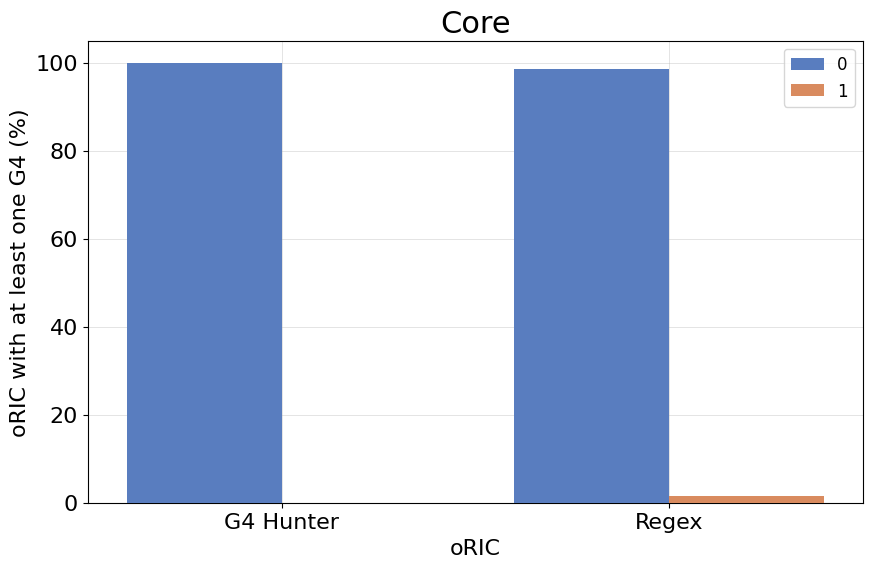

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(data=dataset_of_at_least_one_g4_present_in_window.query("type == 'Core'"), 
            x="method", 
            hue="without_g4", 
            y="percentage",
            palette="muted",
            zorder=3,
            errorbar=None,
           )
ax.legend(loc=0, prop={"size": 12})
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("oRIC")
ax.xaxis.label.set_size(16)
ax.set_ylabel("oRIC with at least one G4 (%)")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=16)
ax.set_title("Core")
ax.title.set_size(22)


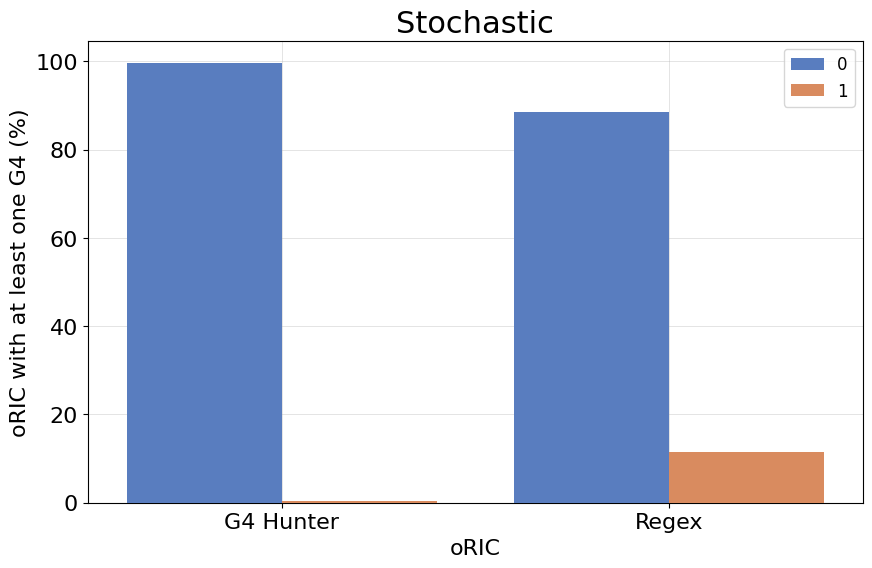

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.barplot(data=dataset_of_at_least_one_g4_present_in_window.query("type == 'Stochastic'"), 
            x="method", 
            hue="without_g4", 
            y="percentage",
            palette="muted",
            zorder=3,
            errorbar=None,
           )
ax.legend(loc=0, prop={"size": 12})
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("oRIC")
ax.xaxis.label.set_size(16)
ax.set_ylabel("oRIC with at least one G4 (%)")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", labelsize=16)
ax.set_title("Stochastic")
ax.title.set_size(22)


In [106]:
chm13v2_inter_stochastic_g4[chm13v2_inter_stochastic_g4['overlap'] == 0]

,seqID,start,end,chrom,motif_start,motif_end,score,overlap,strand,without_g4
575,chr11,38648,48649,.,-1,-1,.,0,+,1
576,chr11,44227,54228,.,-1,-1,.,0,+,1
1377,chr1,244745,254746,.,-1,-1,.,0,+,1
15148,chr1,1082513,1092514,.,-1,-1,.,0,+,1
15972,chr1,1235975,1245976,.,-1,-1,.,0,+,1
...,...,...,...,...,...,...,...,...,...,...
2907888,chrY,62075086,62085087,.,-1,-1,.,0,+,1
2907889,chrY,62076021,62086022,.,-1,-1,.,0,+,1
2907890,chrY,62076212,62086213,.,-1,-1,.,0,+,1
2907891,chrY,62076921,62086922,.,-1,-1,.,0,+,1


# G4 Positional Preference

In [ ]:
chm13v2_inter_stochastic_g4 = pd.read_table(
                        chm13v2_oric_stochastic_bed.intersect(chm13v2_g4hunter_bed, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_stochastic_g4["strand"] = "+"

chm13v2_inter_stochastic_regex = pd.read_table(
                        chm13v2_oric_stochastic_bed.intersect(chm13v2_regex_bed, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_stochastic_regex["strand"] = "+"

In [20]:
chm13v2_inter_core_g4 = pd.read_table(
                        chm13v2_oric_bed.intersect(chm13v2_g4hunter_bed, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_core_g4["strand"] = "+"

chm13v2_inter_core_regex = pd.read_table(
                        chm13v2_oric_bed.intersect(chm13v2_regex_bed, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_core_regex["strand"] = "+"
chm13v2_inter_core_regex

,seqID,start,end,chrom,motif_start,motif_end,score,overlap,strand
0,chr11,7932,17933,chr11,8386,8407,-,21,+
1,chr11,7932,17933,chr11,9136,9162,-,26,+
2,chr11,7932,17933,chr11,15083,15102,+,19,+
3,chr11,7932,17933,chr11,17641,17662,-,21,+
4,chr11,7932,17933,chr11,16666,16686,+,20,+
...,...,...,...,...,...,...,...,...,...
399475,chrY,62081136,62091137,chrY,62090736,62090758,+,22,+
399476,chrY,62081538,62091539,chrY,62091084,62091110,-,26,+
399477,chrY,62081538,62091539,chrY,62090736,62090758,+,22,+
399478,chrY,62081810,62091811,chrY,62091084,62091110,-,26,+


In [21]:
chm13v2_g4hunter_bed_sequence = BedTool.from_dataframe(chm13v2_g4hunter[["seqID", "start", "end", "strand", "sequence"]])

In [22]:
import pybedtools
from pybedtools import BedTool

In [23]:
pd.read_table(chm13v2_oric_bed.fn).head()

,chr11,7932,17933
0,chr11,23229,33230
1,chr11,58655,68656
2,chr1,221705773,221715774
3,chr1,221737542,221747543
4,chr16,96206428,96216429


In [24]:
pd.read_table(chm13v2_g4hunter_bed_sequence.fn, header=None, names=["seqID", "start", "end", "strand", "sequence"]).query("seqID == 'chr11' & start > 7000").head()

,seqID,start,end,strand,sequence
95742,chr11,7287,7312,+,ggtggactcagggctggaggggagg
95743,chr11,7290,7315,+,ggactcagggctggaggggaggagg
95744,chr11,7524,7549,+,ggaggtggggaacagggcaaggagg
95745,chr11,7657,7683,+,tggagactgtgtgggggggcctgggc
95746,chr11,7731,7757,-,ccctgcttcctctctagcccccaccc


In [25]:
t = pd.read_table(chm13v2_oric_bed.intersect(chm13v2_g4hunter_bed_sequence, wo=True).fn,
                     header=None,)
t

,0,1,2,3,4,5,6,7,8
0,chr11,7932,17933,chr11,8227,8266,+,ggggccgcggttgagggtgggagtgggggtgcactggcc,39
1,chr11,7932,17933,chr11,8271,8319,+,ctcaggagctgggggtggtggtgggggcggtgggggtggtgttagtac,48
2,chr11,7932,17933,chr11,8385,8411,-,tccccggcccagctcccatcccagaa,26
3,chr11,7932,17933,chr11,8468,8494,+,ggaatggtgccaggggcagagggggc,26
4,chr11,7932,17933,chr11,8478,8506,+,caggggcagagggggcaatgccggggcc,28
...,...,...,...,...,...,...,...,...,...
1690690,chrY,62067404,62077405,chrY,62068583,62068628,-,attccactccattccactcccctcccctccattgcattcccttcc,45
1690691,chrY,62068154,62078155,chrY,62068583,62068628,-,attccactccattccactcccctcccctccattgcattcccttcc,45
1690692,chrY,62081136,62091137,chrY,62090721,62090770,+,accggagactgttgtggggtggggggagaggggagggatagcattagga,49
1690693,chrY,62081538,62091539,chrY,62090721,62090770,+,accggagactgttgtggggtggggggagaggggagggatagcattagga,49


In [26]:
t = pd.read_table(chm13v2_oric_bed.window(chm13v2_g4hunter_bed_sequence, l=200, r=200).fn,
                     header=None,)
t

,0,1,2,3,4,5,6,7
0,chr11,7932,17933,chr11,7731,7757,-,ccctgcttcctctctagcccccaccc
1,chr11,7932,17933,chr11,7748,7773,-,cccccaccctgcagagctggacccc
2,chr11,7932,17933,chr11,8227,8266,+,ggggccgcggttgagggtgggagtgggggtgcactggcc
3,chr11,7932,17933,chr11,8271,8319,+,ctcaggagctgggggtggtggtgggggcggtgggggtggtgttagtac
4,chr11,7932,17933,chr11,8385,8411,-,tccccggcccagctcccatcccagaa
...,...,...,...,...,...,...,...,...
1739220,chrY,62067404,62077405,chrY,62068583,62068628,-,attccactccattccactcccctcccctccattgcattcccttcc
1739221,chrY,62068154,62078155,chrY,62068583,62068628,-,attccactccattccactcccctcccctccattgcattcccttcc
1739222,chrY,62081136,62091137,chrY,62090721,62090770,+,accggagactgttgtggggtggggggagaggggagggatagcattagga
1739223,chrY,62081538,62091539,chrY,62090721,62090770,+,accggagactgttgtggggtggggggagaggggagggatagcattagga


In [27]:
sequences = pd.read_table(
                        chm13v2_oric_bed.intersect(chm13v2_g4hunter_bed_sequence, wo=True).fn,
                        header=None,
                        names=["seqID", "start", "end", "chrom", "motif_start", "motif_end", "score", "overlap"]
            )
chm13v2_inter_core_g4["strand"] = "+"

In [28]:
extractor = PWMExtractor()
extractor

# Density Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
chm13v2_positive_stochastic_regex = chm13v2_inter_stochastic_regex.query("score  == '+'")
chm13v2_negative_stochastic_regex = chm13v2_inter_stochastic_regex.query("score  == '-'")

chm13v2_positive_stochastic_g4hunter = chm13v2_inter_stochastic_g4.query("score == '+'")
chm13v2_negative_stochastic_g4hunter = chm13v2_inter_stochastic_g4.query("score == '-'")

#####################################################################################################

chm13v2_positive_core_regex = chm13v2_inter_core_regex.query("score  == '+'")
chm13v2_negative_core_regex = chm13v2_inter_core_regex.query("score  == '-'")

chm13v2_positive_core_g4hunter = chm13v2_inter_core_g4.query("score == '+'")
chm13v2_negative_core_g4hunter = chm13v2_inter_core_g4.query("score == '-'")

######################################################################################################
WINDOW_SIZE = 5_000

# STOCHASTIC
density_chm13v2_stochastic_regex = extractor.extract_density(chm13v2_inter_stochastic_regex, 
                                                window_size=WINDOW_SIZE)
density_chm13v2_stochastic_g4hunter =  extractor.extract_density(chm13v2_inter_stochastic_g4, 
                                                window_size=WINDOW_SIZE)

# CORE
density_chm13v2_core_regex = extractor.extract_density(chm13v2_inter_core_regex, 
                                                        window_size=WINDOW_SIZE)
density_chm13v2_core_g4hunter =  extractor.extract_density(chm13v2_inter_core_g4, 
                                                        window_size=WINDOW_SIZE)


# STOCHASTIC-CORE REGEX POSITIVE-NEGATIVE
density_chm13v2_positive_stochastic_regex = extractor.extract_density(chm13v2_positive_stochastic_regex, 
                                                                        window_size=WINDOW_SIZE)

density_chm13v2_negative_stochastic_regex = extractor.extract_density(chm13v2_negative_stochastic_regex, 
                                                                        window_size=WINDOW_SIZE)

density_chm13v2_positive_core_regex = extractor.extract_density(chm13v2_positive_core_regex, 
                                                                        window_size=WINDOW_SIZE)

density_chm13v2_negative_core_regex = extractor.extract_density(chm13v2_negative_core_regex, 
                                                                        window_size=WINDOW_SIZE)


# STOCHASTIC-CORE G4Hunter POSITIVE-NEGATIVE
density_chm13v2_positive_stochastic_g4hunter = extractor.extract_density(chm13v2_positive_stochastic_g4hunter, 
                                                                        window_size=WINDOW_SIZE)

density_chm13v2_negative_stochastic_g4hunter = extractor.extract_density(chm13v2_negative_stochastic_g4hunter, 
                                                                        window_size=WINDOW_SIZE)

density_chm13v2_positive_core_g4hunter = extractor.extract_density(chm13v2_positive_core_g4hunter, 
                                                                        window_size=WINDOW_SIZE)

density_chm13v2_negative_core_g4hunter = extractor.extract_density(chm13v2_negative_core_g4hunter, 
                                                                        window_size=WINDOW_SIZE)

In [30]:
from pathlib import Path
import numpy as np
target = Path("oric_chm13v2_figures")
target.mkdir(exist_ok=True)

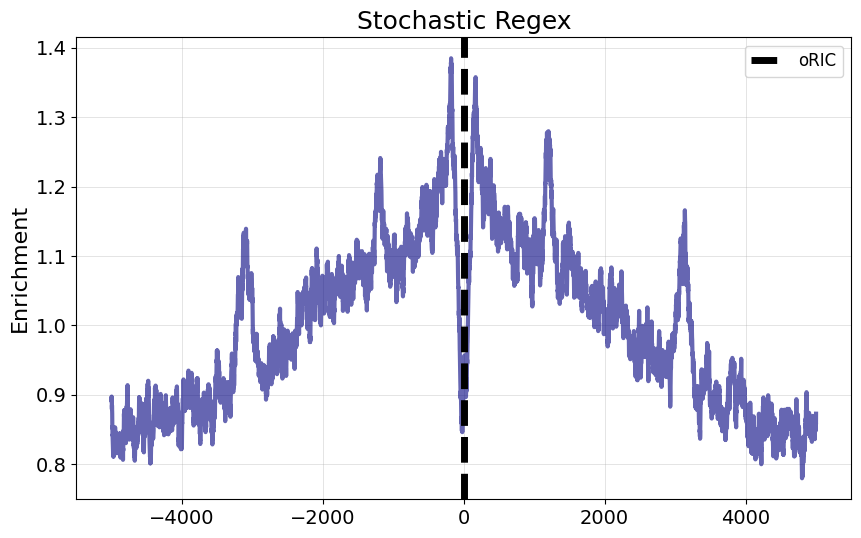

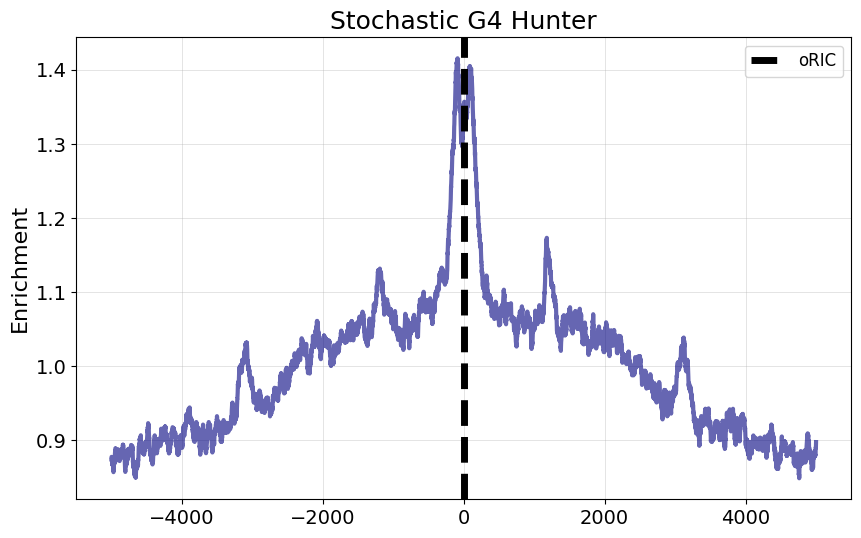

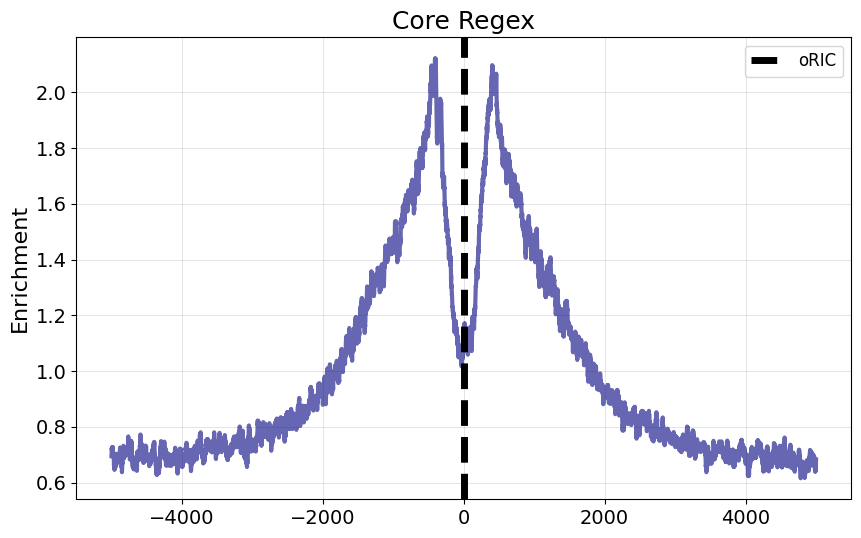

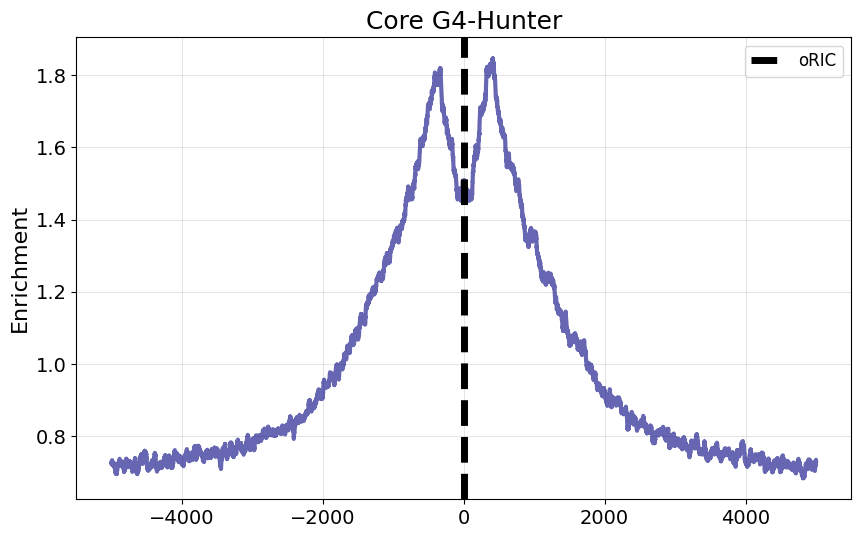

In [33]:
# STOCHASTIC

xaxis = range(-WINDOW_SIZE, WINDOW_SIZE+1)
ORIC_MID = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_stochastic_regex / np.mean(density_chm13v2_stochastic_regex), alpha=0.6, color='navy', lw=3.0)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=5.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Stochastic Regex")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_stochastic_no_split_regex.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_stochastic_g4hunter / np.mean(density_chm13v2_stochastic_g4hunter), alpha=0.6, color='navy', lw=3.0)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=5.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Stochastic G4 Hunter")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_stochastic_no_split_g4hunter.png', bbox_inches='tight')


# CORE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_core_regex / np.mean(density_chm13v2_core_regex), alpha=0.6, color='navy', lw=3.0)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=5.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title(r"Core Regex")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_core_regex_no_split.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_core_g4hunter / np.mean(density_chm13v2_core_g4hunter ), alpha=0.6, color='navy', lw=3.0)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=5.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Core G4-Hunter")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_core_g4hunter_no_split.png', bbox_inches='tight')

In [35]:
gc_skew_df = pd.read_csv("average_gc_skew_ORIC_chm13v2.0_core.txt", header=None, index_col=0, names=["gc_skew"])
# gc_skew_df.index = gc_skew_df.index.map(lambda x: x - WINDOW_SIZE - 1)
gc_skew_df

,gc_skew
-5000,-0.007174
-4999,-0.006799
-4998,-0.007094
-4997,-0.007864
-4996,-0.006332
...,...
4996,0.008690
4997,0.008174
4998,0.007361
4999,0.008575


In [45]:
gc_skew_df = pd.read_table("average_GC_SKEW_ORIC.txt", index_col=0, header=None, names=["gc_skew"])
gc_skew_df.index = gc_skew_df.index.map(lambda x: x - WINDOW_SIZE - 1)
gc_skew_df

,gc_skew
-5000,-0.034846
-4999,-0.033013
-4998,-0.033270
-4997,-0.034843
-4996,-0.031602
...,...
4996,-0.028200
4997,-0.026688
4998,-0.027513
4999,-0.026037


In [56]:
target

PosixPath('oric_chm13v2_figures')

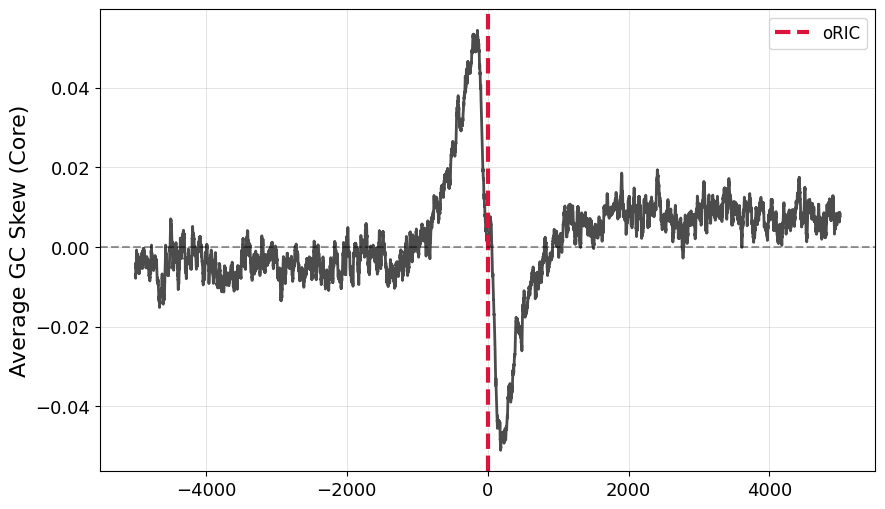

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(gc_skew_df.index, gc_skew_df.values, lw=2.0, color='black', alpha=0.7)
ax.set_xlabel("")
ax.set_ylabel("Average GC Skew (Core)")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", which="major", labelsize=13)
ax.axvline(0, linestyle='--', color='crimson', lw=3.0, label='oRIC')
ax.axhline(0, linestyle='--', color='black', alpha=0.4, lw=1.5)
ax.legend(loc=0, prop={"size": 12})
ax.grid(lw=0.4, alpha=0.6)
fig.savefig(f'{target}/oRIC_average_gc_skew_5000_CORE.png', bbox_inches='tight')

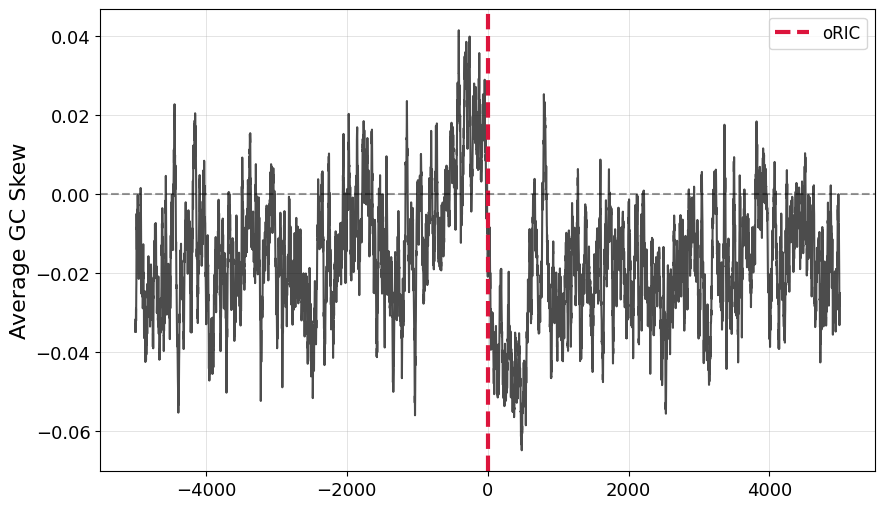

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(gc_skew_df.index, gc_skew_df.values, lw=1.5, color='black', alpha=0.7)
ax.set_xlabel("")
ax.set_ylabel("Average GC Skew")
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", which="major", labelsize=13)
ax.axvline(0, linestyle='--', color='crimson', lw=3.0, label='oRIC')
ax.axhline(0, linestyle='--', color='black', alpha=0.4, lw=1.5)
ax.legend(loc=0, prop={"size": 12})
ax.grid(lw=0.4, alpha=0.6)
fig.savefig(f'{target}/oRIC_average_gc_skew_5000_CORE.png', bbox_inches='tight')

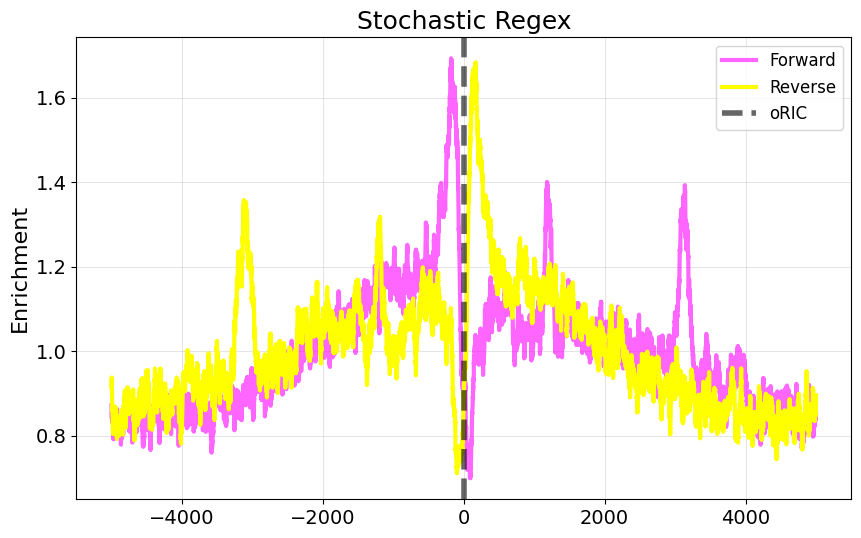

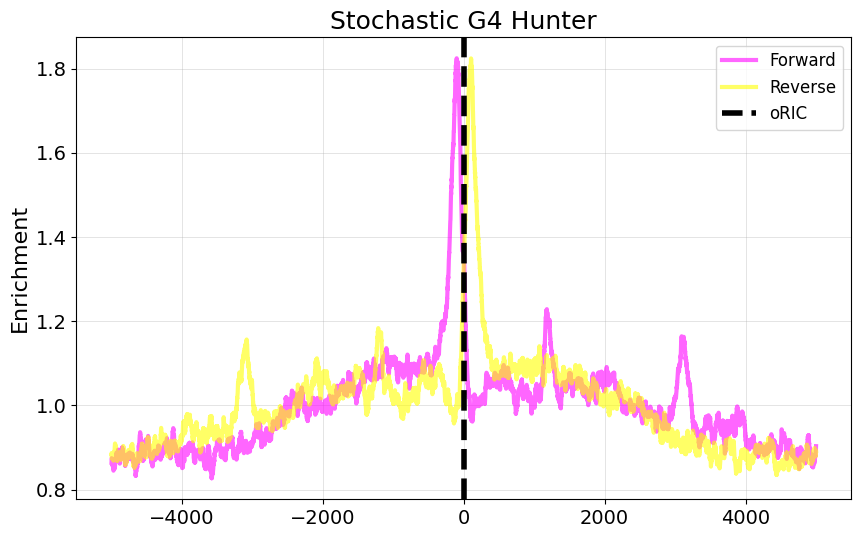

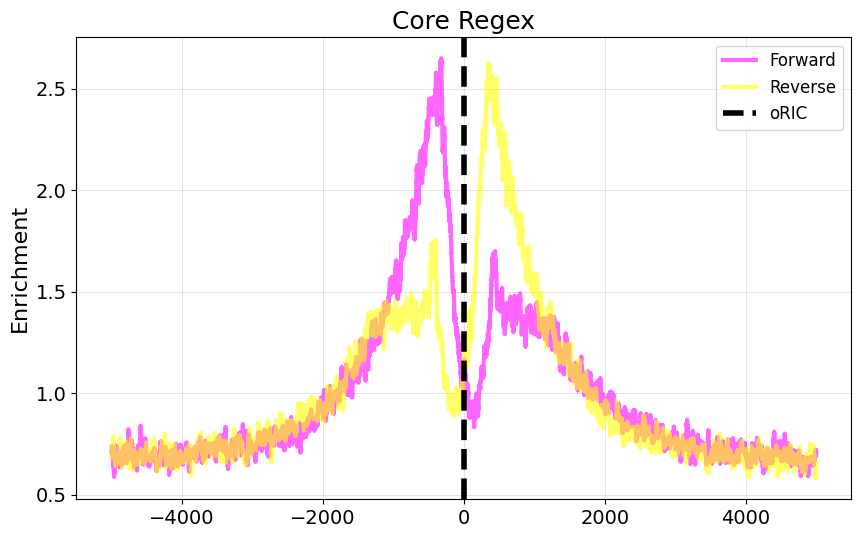

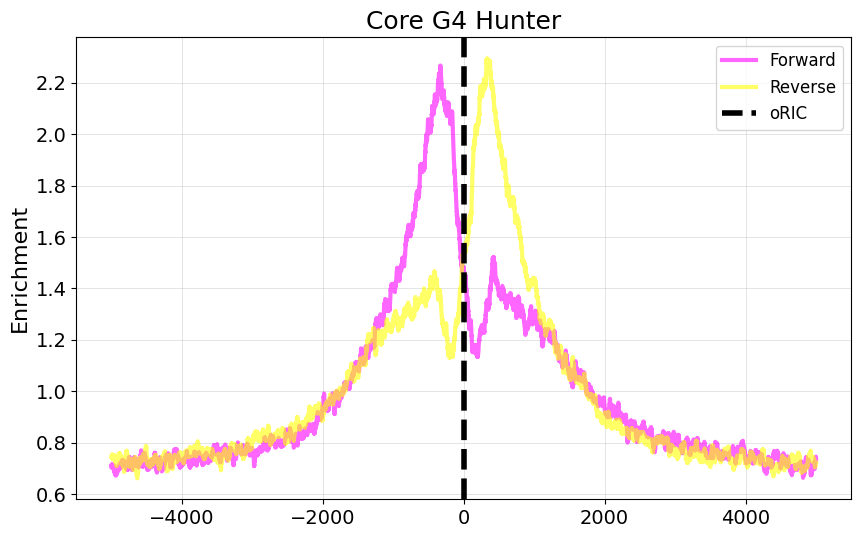

In [35]:
# STOCHASTIC

# constants
xaxis = range(-WINDOW_SIZE, WINDOW_SIZE+1)
ORIC_MID = 0
FORWARD_COLOR = 'magenta'
REVERSE_COLOR = 'yellow'

# plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_positive_stochastic_regex / np.mean(density_chm13v2_positive_stochastic_regex), 
        label='Forward', color=FORWARD_COLOR, lw=3.0, alpha=0.6)
ax.plot(xaxis, density_chm13v2_negative_stochastic_regex / np.mean(density_chm13v2_negative_stochastic_regex), label='Reverse', color=REVERSE_COLOR, lw=3.0)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=4.0, alpha=0.6)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Stochastic Regex")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_stochastic_regex_+-.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_positive_stochastic_g4hunter / np.mean(density_chm13v2_positive_stochastic_g4hunter), 
        label='Forward', color=FORWARD_COLOR, lw=3.0, alpha=0.6
       )
ax.plot(xaxis, density_chm13v2_negative_stochastic_g4hunter / np.mean(density_chm13v2_negative_stochastic_g4hunter), 
        label='Reverse', color=REVERSE_COLOR, lw=3.0, alpha=0.6)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=4.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Stochastic G4 Hunter")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_stochastic_g4hunter_+-.png', bbox_inches='tight')


# CORE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_positive_core_regex / np.mean(density_chm13v2_positive_core_regex), 
        label='Forward', color=FORWARD_COLOR, lw=3.0, alpha=0.6)
ax.plot(xaxis, density_chm13v2_negative_core_regex / np.mean(density_chm13v2_negative_core_regex), 
        label='Reverse', color=REVERSE_COLOR, lw=3.0, alpha=0.6)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=4.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Core Regex")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_core_regex_+-.png', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(xaxis, density_chm13v2_positive_core_g4hunter / np.mean(density_chm13v2_positive_core_g4hunter), 
        label='Forward', color=FORWARD_COLOR, lw=3.0, alpha=0.6,)
ax.plot(xaxis, density_chm13v2_negative_core_g4hunter / np.mean(density_chm13v2_negative_core_g4hunter), 
        label='Reverse', color=REVERSE_COLOR, lw=3.0, alpha=0.6)
ax.axvline(ORIC_MID, label='oRIC', color='black', linestyle ='--', lw=4.0)
ax.grid(lw=0.4, alpha=0.6)
ax.legend(loc=0, prop={"size": 12})
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("")
ax.set_ylabel("Enrichment")
ax.set_title("Core G4 Hunter")
ax.title.set_size(18)
ax.yaxis.label.set_size(16)
fig.savefig(f'{target}/oRIC_core_g4hunter_+-.png', bbox_inches='tight')